### Model

\textbf{Monolayer kagome models with broken $C_3$ symmetry} We begin by presenting a model for the kagome lattice that explicitly breaks $C_3$ symmetry. This Symmetry breaking is crucial for realizing a nontrivial quantum-metric based nonlinear response in these systems. 
The lattice constants are defined as $\mathbf{t}_1 = -\begin{pmatrix}\frac{1}{2} && \frac{\sqrt{3}}{2} \end{pmatrix}$ and $\mathbf{t}_2 = \begin{pmatrix}1 && 0 \end{pmatrix}$. Additionally, we denote $\mathbf{t}_3 = \mathbf{t}_1 - \mathbf{t}_2$ and $k_i = \mathbf{k}\cdot \mathbf{t}_i$. The hopping processes occur within corner-sharing upward triangles, $\Delta$, and downward inverted triangles, $\nabla$. The Hamiltonian is expressed as follows: 

$$\mathcal{H}_{\text{1 Layer}; 0} = - \begin{pmatrix}
        0 && t^{\Delta}_{1} + t^{\nabla}_{1}e^{-ik_1} && t^{\Delta}_{3} + t^{\nabla}_{3}e^{ik_3}\\
        t^{\Delta}_{1} + t^{\nabla}_{1}e^{ik_1} && 0 && t^{\Delta}_{2} + t^{\nabla}_{2}e^{-ik_2}\\
        t^{\Delta}_{3} + t^{\nabla}_{3}e^{-ik_3} && t^{\Delta}_{2} + t^{\nabla}_{2}e^{ik_2} && 0
    \end{pmatrix}$$

To incorporate spin-orbit coupling, the hopping parameters $t^{\Delta/ \nabla}_{i}$ are replaced by $2 \times 2$ matrices in spin space. Specifically, we substitute $t^{\Delta/ \nabla}_{i} \rightarrow \mathcal{M}^{\Delta/ \nabla}_{i} = t^{\Delta/ \nabla}_{i} + i \ \lambda^{\Delta/ \nabla}_{i} \mathbf{\sigma}\cdot \hat{\mathbf{d}_i}$ where, $\hat{\mathbf{d}_i}$ are unit vectors, and $t^{\Delta / \nabla}_{i}$ and $\lambda^{\Delta / \nabla}_{i}$ are nearest neighbor hopping amplitudes and spin-orbit coupling strengths respectively. The vectors $\hat{\mathbf{d}_i}$ are determined by the specific nature of the SOC and are chosen such that the spin component coupled to orbital motion is perpendicular to the direction of motion. For the kagome lattice, we have: 


\begin{align}
\mathbf{\hat{d}_1} &= \cos \theta \begin{pmatrix}0 && 0 && 1 \end{pmatrix} + \sin \theta \begin{pmatrix}\frac{\sqrt{3}}{2} && -\frac{1}{2} && 0 \end{pmatrix} \notag \\
\mathbf{\hat{d}_2} &= \cos \theta \begin{pmatrix}0 && 0 && 1 \end{pmatrix} + \sin \theta \begin{pmatrix}0 && 1 && 0 \end{pmatrix} \notag \\
\mathbf{\hat{d}_3} &= \cos \theta \begin{pmatrix}0 && 0 && 1 \end{pmatrix} + \sin \theta \begin{pmatrix}\frac{-\sqrt{3}}{2} && -\frac{1}{2} && 0 \end{pmatrix}
\end{align}

Taking SOC into account, the Bloch Hamiltonian for a single layer takes the form of a $6 \times 6$ matrix: 

\resizebox{\columnwidth}{!}{
\begin{equation}
    \mathcal{H}_{\text{1 Layer}; \text{SOC}} = 
    - \begin{pmatrix}
        0 && \mathcal{M}^{\Delta \dagger}_{1} + \mathcal{M}^{\nabla \dagger}_{1}e^{-ik_1} && \mathcal{M}^{\Delta}_{3} + \mathcal{M}^{\nabla}_{3}e^{ik_3}\\
        \mathcal{M}^{\Delta}_{1} + \mathcal{M}^{\nabla}_{1}e^{ik_1} && 0 && \mathcal{M}^{\Delta \dagger}_{2} + \mathcal{M}^{\nabla \dagger}_{2}e^{-ik_2}\\
        \mathcal{M}^{\Delta \dagger}_{3} + \mathcal{M}^{\nabla \dagger}_{3}e^{-ik_3} && \mathcal{M}^{\Delta}_{2} + \mathcal{M}^{\nabla}_{2}e^{ik_2} && 0
        \end{pmatrix}
\end{equation}
}


In [3]:
using LinearAlgebra
using Makie 
using CairoMakie 
using Brillouin
using Printf
using PlotlyJS
using Symbolics
using StaticArrays

--- Plotting the Wigner-Seitz cell in real space. 

--- Vertices of the real Wigner-Seitz cell (in reduced coordinates): 
  0.666667   0.333333 
  0.333333  -0.333333 
 -0.333333  -0.666667 
 -0.666667  -0.333333 
 -0.333333   0.333333 
  0.333333   0.666667 

--- Plotting the Wigner-Seitz cell in reciprocal space. 

--- Vertices of the reciprocal space Wigner-Seitz cell (in reduced coordinates): 
 -0.666667   0.333333 
 -0.333333   0.666667 
  0.333333   0.333333 
  0.666667  -0.333333 
  0.333333  -0.666667 
 -0.333333  -0.333333 

--- Vertices of the reciprocal space Wigner-Seitz cell (in cartesian coordinates): 
  2.094395   3.627599 
  4.188790  -0.000000 
  2.094395  -3.627599 
 -2.094395  -3.627599 
 -4.188790   0.000000 
 -2.094395   3.627599 



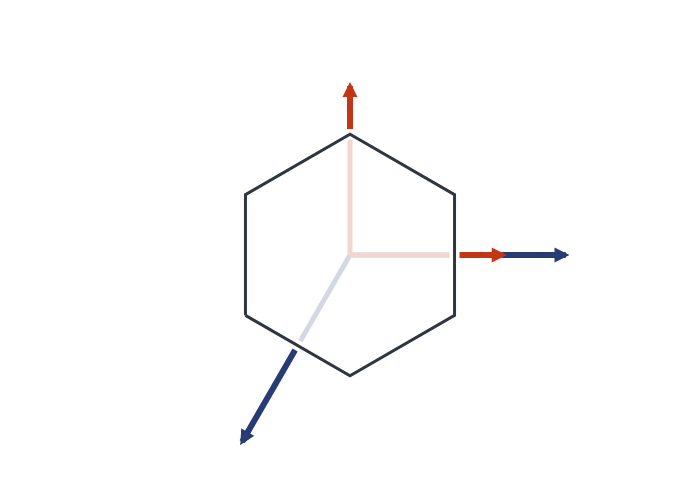

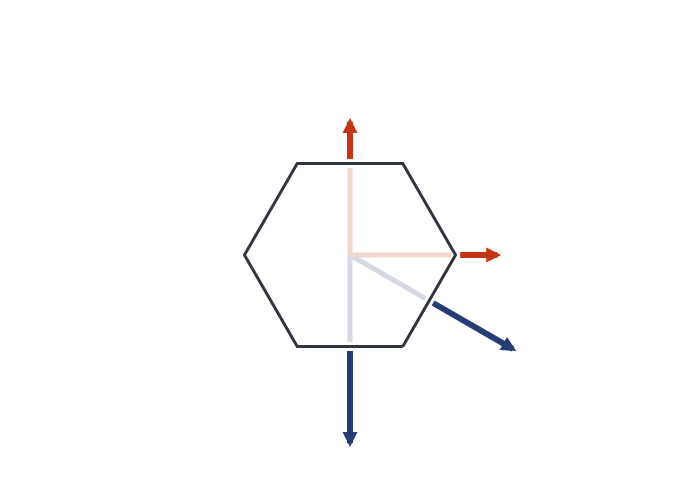

In [4]:
# Useful C_3 rotation
global const C_3::Matrix{Float64} = [cos(2.0*pi/3.0) -sin(2.0*pi/3.0); sin(2.0*pi/3.0) cos(2.0*pi/3.0)]

# Useful C_6 rotation
global const C_6::Matrix{Float64} = [cos(pi/3.0) -sin(pi/3.0); sin(pi/3.0) cos(pi/3.0)]


# Reciprocal and Direct Lattice   R1 and R2 are the basis vectors in the real space ! 
global const R1::Vector{Float64} = [-0.5, -0.5 * sqrt(3.0)]
global const R2::Vector{Float64} = C_3 * R1
global const R3::Vector{Float64} = C_3 * R2;

# Now, the reciprocal lattice 
global const R::Matrix{Float64} = [R1 R2]';
global const G::Matrix{Float64} = 2.0 * pi * inv(R');

let
    print("--- Plotting the Wigner-Seitz cell in real space. \n")
    print("\n")

    As = [R[i, :] for i ∈ 1 : size(R, 1)]
    real_wignerseitz = wignerseitz(As)

    vertices = real_wignerseitz.verts

    print("--- Vertices of the real Wigner-Seitz cell (in reduced coordinates): \n")
    for v ∈ vertices
        @printf("%10f %10f \n", v[1], v[2])
    end
    print("\n")

    pbzb = PlotlyJS.plot(real_wignerseitz)
    display(pbzb)

end

let
    print("--- Plotting the Wigner-Seitz cell in reciprocal space. \n")
    print("\n")

    G1 = G[1, :]; G2 = G[2, :]
    Gs = [G[i, :] for i ∈ 1 : size(G, 1)]
    recip_wignerseitz = wignerseitz(Gs)

    vertices = recip_wignerseitz.verts

    # Here, we want the cartesian coordinates of the corners (vertices of the FBZ). We also need the cartesian coordinates of the M point 
    global cart_v::Vector{Vector{Float64}} = similar(vertices)
    for i ∈ 1:size(cart_v, 1)
        red_v = vertices[i]
        cart_v[i] = red_v[1] * G1 + red_v[2] * G2
    end

    print("--- Vertices of the reciprocal space Wigner-Seitz cell (in reduced coordinates): \n")
    for v ∈ vertices
        @printf("%10f %10f \n", v[1], v[2])
    end
    print("\n")

    print("--- Vertices of the reciprocal space Wigner-Seitz cell (in cartesian coordinates): \n")
    for v ∈ cart_v
        @printf("%10f %10f \n", v[1], v[2])
    end
    print("\n")

    pbzb = PlotlyJS.plot(recip_wignerseitz)
    display(pbzb)

end

In [ ]:
global const cK::SVector{2, Float64} = SVector{2, Float64}(cart_v[2])
global const cK_I::SVector{2, Float64} = @SVector [2.094395, 3.627599]
# Now, the K-Points 
global const high_symmetry_points = Dict{String, SVector{2, Float64}}(
    "K"=> cK, 
    "M"=> (cK + cK_I) / 2.0,
    "Γ"=> [0.0, 0.0] 
)


In [8]:
global const σ₀::Matrix{ComplexF64} = @SMatrix [1.0 0.0; 0.0 1.0]
global const σ₁::Matrix{ComplexF64} = @SMatrix [0.0 1.0; 1.0 0.0]
global const σ₂::Matrix{ComplexF64} = @SMatrix [0.0 -im; im 0.0]
global const σ₃::Matrix{ComplexF64} = @SMatrix [1.0 0.0; 0.0 -1.0]

struct ParamsSOCModel

    # we will use unicode characters to name the variables 

    # Parameters for the upright triangle 
    
    # Orbital Hoppings 
    t1Δ::Float64
    t2Δ::Float64
    t3Δ::Float64

    # Spin orbit coupling 
    λ1Δ::Float64
    λ2Δ::Float64
    λ3Δ::Float64
    

    # Parameters for the upside down triangle 
    
    # Orbital Hoppings 
    t1∇::Float64
    t2∇::Float64
    t3∇::Float64
    #  Spin orbit coupling 
    λ1∇::Float64
    λ2∇::Float64
    λ3∇::Float64

    # theta 
    θ::Float64

end



In [11]:
global const T1u  = @SArray ComplexF64[0.0 1.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const T2u  = @SArray ComplexF64[0.0 0.0 1.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const T3u  = @SArray ComplexF64[0.0 0.0 0.0; 0.0 0.0 1.0; 0.0 0.0 0.0];


@inline d̂₁ = θ -> SVector{3, Float64}(cos(θ) * sqrt(3.0)/2.0, -0.5 * cos(θ), sin(θ))
@inline d̂₂ = θ -> SVector{3, Float64}(0.0, cos(θ), sin(θ))
@inline d̂₃ = θ -> SVector{3, Float64}(cos(θ) * sqrt(3.0)/2.0, 0.5 * cos(θ), sin(θ))

@inline M₁ = (θ, t, λ) -> SMatrix{2, 2, ComplexF64}((t * σ₀ +
             im * (d̂₁(θ)[1] * σ₁ + d̂₁(θ)[2] * σ₂ + d̂₁(θ)[3] * σ₃)))

@inline M₂ = (θ, t, λ) -> SMatrix{2, 2, ComplexF64}((t * σ₀ +
             im * (d̂₂(θ)[1] * σ₁ + d̂₂(θ)[2] * σ₂ + d̂₂(θ)[3] * σ₃)))

@inline M₃ = (θ, t, λ) -> SMatrix{2, 2, ComplexF64}((t * σ₀ +
             im * (d̂₃(θ)[1] * σ₁ + d̂₃(θ)[2] * σ₂ + d̂₃(θ)[3] * σ₃)))




#73 (generic function with 1 method)